In [1]:
# Construct a portfolio with any 10 stocks of your choice (use daily adjusted closing prices) and computes the max Sharpe ratio and optimal weights. 
# You will also need to plot the respective efficient frontier.
# As part of  your stock selection, you will need to look at  the pairwise correlations to gain insights about  your selection, and also look at their individual past performance.
# As part of your presentation, you will need to tell the story of how you decided on the stocks that you included, 
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf

# inflation rate from 2017 to 2022=>15.09%, yield of US treasury bond=>2.78%, risk free rate=>12.31%
# all in USD, as of 8/1/2022
# Apple AAPL  5yrs ago 162.36, 161.51
# Alphabet GOOG 5yrs ago  116, 114.86
# AMD 5 years ago 13.12, 99.29 
# Amazon AMZN, Inc 5 years ago, 137.23, 135.39
# Tencent TCEHY 5 years ago 37.92, 37.32
# Samsung SMSN.IL 5 years ago, 47.21, 47.15
# Kering KER.PA 5 years ago 55.5, 56.72
# LVMH MC.PA 5 years ago 138.28, 140.77
# Tesla TSLA 71.38, 901.76
# Nike NKE 59.76, 111.17
all_data = {ticker: yf.download(ticker, start='2017-01-01', end='2023-12-30')
            for ticker in ['AAPL', 'TSLA', 'GOOG', 'AMD', 'MC.PA', 'KER.PA', 'NKE', 'TCEHY', 'SMSN.IL', 'AMZN']}
price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})
print(price.describe())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

              AAPL         TSLA         GOOG          AMD        MC.PA  \
count  1760.000000  1760.000000  1760.000000  1760.000000  1791.000000   
mean     98.360893   128.150937    85.058612    60.023869   452.152639   
std      54.120465   113.857011    33.544603    39.999859   208.732960   
min      26.993458    11.931333    39.306999     9.530000   156.317551   
25%      44.464800    21.119000    55.565876    19.890000   264.207993   
50%      89.518559    77.609665    73.767002    56.059999   382.816589   
75%     147.439224   234.232506   115.830999    92.292501   639.512817   
max     198.110001   409.970001   150.709000   161.910004   887.959778   

            KER.PA          NKE        TCEHY      SMSN.IL         AMZN  
count  1791.000000  1760.000000  1760.000000  1766.000000  1760.000000  
mean    455.441788    97.031352    47.088094  1140.018417   109.850845  
std     122.249456    31.712540    12.986634   292.084205    39.864555  
min     169.127380    47.603058    22.653

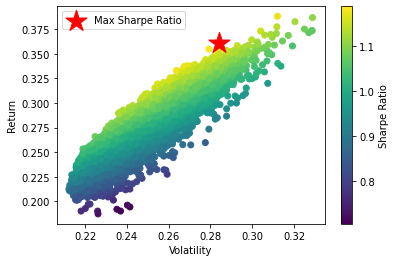

Max Sharpe Ratio Portfolio Return: 0.3609397168520357
Max Sharpe Ratio Portfolio Volatility: 0.284329949243917
Max Sharpe Ratio Portfolio Weights: [0.09012705 0.08215546 0.14739946 0.13368863 0.11259097 0.11969183
 0.11014944 0.03755502 0.12781941 0.03882272]


In [22]:
# Calculate daily returns
returns = price.pct_change()

# Calculate expected returns and covariance matrix
expected_returns = returns.mean()
cov_matrix = returns.cov()

# Number of portfolios to simulate
num_portfolios = 10000

# Initialize results arrays
results = np.zeros((3, num_portfolios))
risk_free_rate = 0.023  # You can adjust this based on the current risk-free rate

for i in range(num_portfolios):
    weights = np.random.random(len(price.columns))
    weights /= np.sum(weights)
    
    # Expected Portfolio Return
    portfolio_return = np.sum(expected_returns * weights) * 252

    # Expected Portfolio Volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))

    # Sharpe Ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

# Get the maximum Sharpe ratio portfolio
max_sharpe_ratio_index = results[2].argmax()
max_sharpe_ratio_return = results[0, max_sharpe_ratio_index]
max_sharpe_ratio_volatility = results[1, max_sharpe_ratio_index]
max_sharpe_ratio_weights = weights

# Plot the efficient frontier
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sharpe_ratio_volatility, max_sharpe_ratio_return, marker='*', color='r', s=500, label='Max Sharpe Ratio')
plt.legend()

# Display the plot
plt.show()

# Display max Sharpe ratio and optimal weights
print(f"Max Sharpe Ratio Portfolio Return: {max_sharpe_ratio_return}")
print(f"Max Sharpe Ratio Portfolio Volatility: {max_sharpe_ratio_volatility}")
print(f"Max Sharpe Ratio Portfolio Weights: {max_sharpe_ratio_weights}")
